<a href="https://colab.research.google.com/github/aasem/cvisionmcs/blob/main/%5Chomeworks%5CH01_kNN_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1
## k-Nearest Neighbour Classifier for MNIST Dataset
MNIST Handwritten Digits dataset is a benchmark dataset containing 7000 images of size `28 x 28` pixels.

**Data Access and Dividing into Training and Test Sets**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
%matplotlib inline

#loading
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#shape of dataset
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


**Data Visualization**

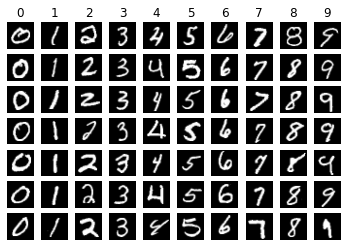

In [23]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'), cmap=plt.get_cmap('gray'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

**Subsampling the Data**

In [24]:
# Work with a small dataset to save time
num_training = 10000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 1000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [25]:
# reshaping data and placing into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(10000, 784) (1000, 784)


**Implementing kNN from Scikit Learn Library**

**Step 1: Choose Model Specific Hyperparameters**
1.   Distance Metric = Euclidean
2.   Number of nearest neigbours $k = 3$

In [26]:
# instantiating the classifier
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

**Step 2: Train the Model**

In [27]:
# training the model by feeding it the whole training dataset
kNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**Step 3: Run the Model on Training Data and Compute Training Accuracy**

In [28]:
# predict the class labels for the training dataset
y_train_pred = kNN.predict(X_train)

In [29]:
# compute training accuracy
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_train_pred)
print('Training accuracy: %f' % (train_acc))

Training accuracy: 0.975500


**Step 4: Run the Model on Test Data and Compute Test Accuracy**

In [31]:
# predict the class labels for the test dataset
# y_test_pred = #### fill in the code here and uncomment ####

In [ ]:
# compute test accuracy
from sklearn.metrics import accuracy_score
# test_acc = #### fill in the code here an uncomment ####
print('Test accuracy: %f' % (test_acc))

**Questions (5 marks)**


1.   As you can see, the model already gives 97.55% accuracy on the subsampled snapshot of the training data. Fill in the code for the test dataset for the same snapshot and report accuracy on snapshot test dataset **(1 mark)**
2.   Report the test accuracy for $k=5$ and L1 norm (Manhattan Distance) for the whole dataset **(1 mark)**
3.   Consider a preprocessing step of subtracting the pixel wise mean (the mean image) from the training dataset before training the model. Add your preprocessing step as a new cell in the same notebook to keep everything tidy. Now run the new model (with L2 distance and $k=3$) after this preprocessing step and report test accuracy for the whole dataset. **(1 marks)**
4.    It should be interesting to find out all the test cases where the KNN failed. How many are these test cases? Plot at least one such example from each class and speculate why the classifier failed. **(2 marks)** 